## Read Libraries

In [6]:
import numpy as np
import numpy.random as random
import scipy as sp
import pandas as pd
from pandas import Series, DataFrame

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline
import math
from sklearn.model_selection import train_test_split,GridSearchCV, LeaveOneOut
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor as RFR
import pickle
# %precision 3

## Mobility&beta データ読み込み

In [7]:
#beta = pd.read_csv('beta_210210.csv')
beta = pd.read_csv('beta_Data.csv')
env = pd.read_csv('env2.csv')
n_b = 311 #number of beta
n_e = 313 #number of env
n1 = 206 #number of data till Oct 15

In [8]:
env
beta

,0
0,0.243761
1,0.276854
2,0.315159
3,0.373410
4,0.308755
...,...
306,0.054242
307,0.054804
308,0.051790
309,0.049368


# 関数

In [9]:
def RF_calc (x,y):
#%%time
#stand=np.arange(1,2)

#data=pd.read_csv('output_1.csv')


#x = env
#y = beta.iloc[0:317,0]

    

    '''    
    search_params = {
        'n_estimators'      : [5, 10, 20, 30, 50, 100, 300],
        'max_features'      : [i for i in range(1, x.shape[1])],
        'random_state'      : [i for i in range(10)],
        'n_jobs'            : [1],
        'min_samples_split' : [5, 10],
        'max_depth'         : [3, 4, 5, 10, 15, 20, 25, 30, 40, 50, 100]
    }
    '''


    search_params = {
        'n_estimators'      : [5, 10, 20, 30, 50, 100, 300],
        'max_features'      : [i for i in range(3, 10)],
        'random_state'      : [1], #i for i in range(10)],
        'n_jobs'            : [1],
        'min_samples_split' : [5], #, 10],
        'max_depth'         : [5, 10, 15, 20]
    }






    gsr = GridSearchCV(
        RFR(),
        search_params,
        cv = 10,
        n_jobs = -7,
        verbose=True
    )

    gsr.fit(x,y)
    beta_tree=gsr.best_estimator_
    beta_score_train=gsr.best_score_
#k_score_test=gsr1.best_estimator_.score(X_test,Y_test)
    beta_importances = gsr.best_estimator_.feature_importances_
    #k_score_test=gsr.best_estimator_.score(X_test,Y_test)
    return gsr



In [10]:
alpha = 0
t_delay = 5
clm = np.arange(0,n_b-n1)


#for k in range(n_a):
for l in range (t_delay):
    k = l + 6
    ind = np.arange(0,n_b+k)
    Pred_Beta = pd.DataFrame(index=ind, columns=clm)
    for tt in range (n_b-n1-1):
        x = env[0:n1-k+tt]
        x_t = env[n1-k+tt:n1+tt+1]
        y = beta.iloc[k:n1+tt,alpha]
        X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.0000001, random_state = 100)
        gsr = RF_calc (X_train,Y_train)
        y_t = gsr.predict(x_t)
        Pred_Beta.iloc[n1+tt:n1+k+tt+1,tt] = y_t
    a_file = 'beta_pred_' + str(k) + '.csv'
    Pred_Beta.to_csv(a_file)

Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.
[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:   14.1s
[Parallel(n_jobs=-7)]: Done 349 tasks      | elapsed:   14.8s
[Parallel(n_jobs=-7)]: Done 1460 tasks      | elapsed:   17.5s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:   18.7s remaining:    1.1s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:   19.6s finished


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.
[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 762 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-7)]: Done 1778 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.6s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.5s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  86 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 760 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-7)]: Done 1784 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.6s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.5s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 764 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-7)]: Done 1787 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.6s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.5s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-7)]: Done 762 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1787 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.8s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.6s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 764 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-7)]: Done 1781 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.7s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.5s finished


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.
[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 764 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-7)]: Done 1787 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.7s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.6s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 764 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-7)]: Done 1787 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.7s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.6s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 552 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-7)]: Done 1252 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.9s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.5s finished


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.
[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 758 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-7)]: Done 1784 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.8s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.7s finished


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.
[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 760 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-7)]: Done 1781 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.8s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.6s finished


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.
[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 762 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-7)]: Done 1781 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.7s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.6s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-7)]: Done 764 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1784 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.8s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.8s finished


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.
[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 762 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-7)]: Done 1787 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.8s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.7s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 762 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-7)]: Done 1781 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.8s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.6s finished


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.
[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 764 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1790 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.8s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.7s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-7)]: Done 552 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-7)]: Done 1252 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.8s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.5s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 764 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1781 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.8s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.7s finished


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.
[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 764 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1787 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.9s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.8s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 764 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1781 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.8s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.7s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 760 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1781 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.8s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.7s finished


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.
[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 764 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-7)]: Done 1784 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.8s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.7s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 762 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-7)]: Done 1790 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.7s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 760 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-7)]: Done 1787 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.8s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.7s finished


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.
[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 762 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-7)]: Done 1784 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.9s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.7s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 760 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-7)]: Done 1784 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.8s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.7s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 764 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1781 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.9s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.8s finished


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.
[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 762 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1793 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.9s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.7s finished


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.
[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 762 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1790 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    5.0s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.9s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 764 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1784 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.9s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.8s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 762 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-7)]: Done 1784 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.9s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.8s finished


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.
[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 762 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1784 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.9s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.8s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 764 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1784 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.9s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.7s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  85 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-7)]: Done 760 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-7)]: Done 1784 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    5.0s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.8s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 764 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1787 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.9s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.7s finished


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.
[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 762 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1787 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.9s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.7s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 760 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1784 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.9s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.8s finished


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.
[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 760 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1787 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.9s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.8s finished


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.
[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 760 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1790 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.9s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.9s finished


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.
[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 762 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-7)]: Done 1784 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.9s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.8s finished


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.
[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 760 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1796 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.9s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.8s finished


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.
[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 762 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1787 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.9s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.8s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 764 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1778 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.9s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.9s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 762 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1781 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    5.0s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.9s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 764 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1784 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    5.0s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.9s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 762 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1784 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    5.0s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.9s finished


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.
[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 764 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1787 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.9s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.8s finished


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.
[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 762 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1784 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    5.1s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    6.0s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 762 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1784 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    5.0s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.9s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 764 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1784 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.9s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 764 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1787 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    5.0s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.9s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 758 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1787 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.9s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.9s finished


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.
[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 762 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1784 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    5.0s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    6.0s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 762 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1787 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    5.0s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.9s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 764 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1778 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    5.0s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    6.0s finished


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.
[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 762 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1784 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    5.0s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.9s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 764 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1790 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    5.0s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.9s finished


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.
[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 764 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1787 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    5.1s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    6.0s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 760 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1781 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    5.0s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.9s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 762 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1784 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    5.0s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.9s finished


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.
[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 760 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1784 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    5.0s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.8s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 764 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1787 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.9s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.8s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  85 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 764 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1784 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    5.0s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.9s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 764 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1784 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    5.0s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.9s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 760 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1784 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    5.0s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.9s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 760 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1781 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.9s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 760 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1781 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.9s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 760 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1787 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    5.1s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    6.1s finished


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.
[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 762 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1784 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.9s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.9s finished


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.
[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 664 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    6.2s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 762 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-7)]: Done 1784 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.9s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 760 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1793 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    5.0s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.9s finished


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.
[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 764 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1784 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    5.0s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    6.0s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 762 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1787 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    5.0s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.9s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 762 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1781 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    5.0s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.9s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 764 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1784 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    5.0s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    6.0s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 762 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1790 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    6.0s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 760 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1784 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    5.0s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    6.0s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 762 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1784 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    5.0s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.9s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 762 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1781 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    5.0s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    6.0s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 762 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1781 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    6.0s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 762 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1784 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    5.0s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    6.0s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 762 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1790 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    5.0s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.9s finished


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.
[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 762 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1787 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    5.0s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.9s finished


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.
[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 758 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1790 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    5.1s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    6.0s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 762 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1781 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    6.0s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 762 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1784 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    5.2s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    6.1s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 762 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-7)]: Done 1778 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    5.1s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    6.1s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 760 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1787 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    5.1s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    6.0s finished


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.
[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-7)]: Done 764 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-7)]: Done 1790 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    5.2s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    6.1s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 764 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1790 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    5.1s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    6.1s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 764 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1787 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    5.1s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    6.1s finished


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.
[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 764 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1787 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    5.1s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    6.1s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 760 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1787 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    6.0s finished


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.
[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 762 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1784 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    5.1s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    6.1s finished


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.
[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 762 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1790 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    5.2s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    6.1s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 762 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-7)]: Done 1781 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    5.2s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    6.1s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 762 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1784 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    5.1s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    6.1s finished


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.
[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 762 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1787 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    5.1s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    6.1s finished


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.
[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 762 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1790 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    5.1s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    6.1s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 760 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1790 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    5.2s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    6.1s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 762 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1784 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    5.1s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    6.1s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 762 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-7)]: Done 1778 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    5.2s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    6.1s finished


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.
[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 758 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1784 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    5.1s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    6.1s finished


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.
[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 764 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-7)]: Done 1787 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.5s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-7)]: Done 762 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1784 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.8s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.6s finished


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.
[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 762 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-7)]: Done 1784 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.5s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 764 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-7)]: Done 1784 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.6s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.5s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  85 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 764 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-7)]: Done 1784 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.7s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.6s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 760 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-7)]: Done 1775 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.6s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.5s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 762 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-7)]: Done 1784 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.5s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 760 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-7)]: Done 1781 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.7s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.5s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 762 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-7)]: Done 1787 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.6s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.5s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 764 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-7)]: Done 1781 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.7s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.4s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 762 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-7)]: Done 1781 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.6s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.5s finished


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.
[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 760 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-7)]: Done 1790 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.7s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.6s finished


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.
[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 762 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-7)]: Done 1784 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.7s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.5s finished


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.
[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 760 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-7)]: Done 1787 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.7s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.6s finished


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.
[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 764 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-7)]: Done 1796 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.7s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.5s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 762 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-7)]: Done 1787 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.7s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.5s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 762 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-7)]: Done 1784 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.7s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.6s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 758 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-7)]: Done 1784 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.6s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 760 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-7)]: Done 1787 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.6s finished


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.
[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-7)]: Done 662 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.8s finished


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.
[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 762 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-7)]: Done 1787 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.7s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.5s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  85 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 764 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-7)]: Done 1793 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.8s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.7s finished


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.
[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 762 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-7)]: Done 1781 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.6s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 762 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-7)]: Done 1790 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.7s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.5s finished


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.
[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 764 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-7)]: Done 1790 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.7s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.7s finished


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.
[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 760 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-7)]: Done 1781 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.8s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.7s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 762 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-7)]: Done 1784 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.7s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.6s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 762 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-7)]: Done 1784 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.8s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.7s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 764 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-7)]: Done 1787 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.8s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.7s finished


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.
[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 762 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-7)]: Done 1784 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.8s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.7s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 762 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-7)]: Done 1793 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.7s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.6s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 764 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1784 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.9s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.7s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 762 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1784 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.9s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.7s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 758 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-7)]: Done 1784 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.8s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.7s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 764 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-7)]: Done 1787 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.7s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 760 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-7)]: Done 1784 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.8s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.7s finished


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.
[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 762 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-7)]: Done 1787 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.8s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.6s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 762 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1787 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.8s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.7s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 760 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-7)]: Done 1790 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.8s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.7s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 762 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-7)]: Done 1790 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.8s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.6s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 762 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1796 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.8s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.7s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  85 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 760 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-7)]: Done 1778 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.8s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.8s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-7)]: Done 764 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1781 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.9s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.9s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 758 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-7)]: Done 1781 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.7s finished


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.
[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 762 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-7)]: Done 1784 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.7s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-7)]: Done 552 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-7)]: Done 1252 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.9s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.5s finished


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.
[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 762 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-7)]: Done 1787 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.8s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.7s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 760 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-7)]: Done 1784 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.8s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.8s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 762 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-7)]: Done 1781 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.8s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.8s finished


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.
[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-7)]: Done 760 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1778 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    5.0s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.9s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 758 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-7)]: Done 1784 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.9s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.8s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 762 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1787 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.9s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.8s finished


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.
[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 764 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1784 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    5.0s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.9s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 762 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1784 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    5.0s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.8s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 762 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-7)]: Done 1787 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.9s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.8s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 762 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1784 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    5.0s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.9s finished


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.
[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 762 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-7)]: Done 1781 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.9s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.8s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 760 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1781 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    5.0s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.9s finished


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.
[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 760 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1787 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    5.0s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.9s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 762 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1793 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    5.0s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.9s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 764 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1781 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    5.0s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.9s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 762 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1781 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    6.0s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-7)]: Done 552 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-7)]: Done 1252 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.7s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 762 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1781 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    5.0s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.9s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 762 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1787 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.9s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 762 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1784 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    5.0s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.9s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 760 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1787 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    5.0s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    6.0s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 762 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1790 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    5.0s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.9s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 760 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1787 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    5.0s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.9s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 764 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1790 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    5.0s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.9s finished


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.
[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 764 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1784 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    6.0s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 762 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-7)]: Done 1784 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    5.2s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    6.1s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 760 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1781 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    5.0s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    6.0s finished


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.
[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 762 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1784 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    5.1s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    6.0s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 762 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1787 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    5.1s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.9s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 762 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-7)]: Done 1784 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    5.2s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    6.1s finished


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.
[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 764 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1787 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    5.0s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.9s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 764 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1787 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    6.0s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 762 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1787 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    5.0s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    6.0s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 762 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1790 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    5.1s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    6.0s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 762 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1790 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    6.1s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 762 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-7)]: Done 1790 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    5.2s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    6.2s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 764 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1787 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    5.1s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    6.0s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 762 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1781 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    5.1s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    6.0s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 762 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1784 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    5.1s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    6.0s finished


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.
[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 760 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1787 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    5.1s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    6.0s finished


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.
[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 762 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1781 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    5.1s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    6.1s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 762 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1787 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    5.1s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    6.1s finished


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.
[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 762 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1787 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    6.1s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 764 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1790 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    6.0s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 764 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-7)]: Done 1787 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    5.3s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    6.2s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 764 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1781 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    5.2s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    6.2s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-7)]: Done 762 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-7)]: Done 1781 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    5.2s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    6.2s finished


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.
[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 760 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1784 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    5.2s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    6.1s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 762 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1781 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    5.2s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    6.1s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 764 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-7)]: Done 1787 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    5.2s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    6.1s finished


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.
[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 762 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1787 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    5.2s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    6.1s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 762 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1787 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    5.2s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    6.1s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 758 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1784 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    5.1s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    6.1s finished


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.
[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 764 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1787 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    6.2s finished


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.
[Parallel(n_jobs=-7)]: Done  85 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 764 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1784 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    5.1s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    6.1s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 764 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1778 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    5.2s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    6.1s finished


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.
[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 760 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1790 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    5.1s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    6.1s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 764 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1778 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    5.1s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    6.1s finished


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.
[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 760 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-7)]: Done 1784 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.6s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.5s finished


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.
[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 760 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-7)]: Done 1778 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.6s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.4s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  85 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 762 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-7)]: Done 1790 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.6s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.5s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 760 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-7)]: Done 1787 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.6s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.5s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 764 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-7)]: Done 1787 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.5s finished


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.
[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 762 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-7)]: Done 1790 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.7s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.6s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 762 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-7)]: Done 1778 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.7s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.5s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 762 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-7)]: Done 1790 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.5s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 764 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-7)]: Done 1790 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.6s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.5s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 758 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-7)]: Done 1787 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.7s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.5s finished


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.
[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 764 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-7)]: Done 1784 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.7s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.5s finished


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.
[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 762 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-7)]: Done 1793 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.5s finished


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.
[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 760 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-7)]: Done 1787 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.7s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.5s finished


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.
[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-7)]: Done 760 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-7)]: Done 1787 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.7s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.6s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 764 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-7)]: Done 1781 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.5s finished


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.
[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 762 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-7)]: Done 1784 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.7s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.6s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 762 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1781 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.8s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.6s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 760 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-7)]: Done 1787 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.7s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.5s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 764 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-7)]: Done 1781 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.5s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 764 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-7)]: Done 1784 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.7s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.6s finished


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.
[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 760 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-7)]: Done 1787 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.7s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.5s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 758 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-7)]: Done 1784 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.7s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.6s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 764 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-7)]: Done 1781 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.7s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.6s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 762 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-7)]: Done 1784 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.8s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.6s finished


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.
[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 760 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-7)]: Done 1778 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.7s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.5s finished


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.
[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 764 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-7)]: Done 1787 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.7s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.6s finished


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.
[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-7)]: Done 762 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1784 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.9s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.8s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 764 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-7)]: Done 1781 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.8s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.6s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 764 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-7)]: Done 1778 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.8s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.6s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 760 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-7)]: Done 1784 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.8s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.6s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 762 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-7)]: Done 1787 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.8s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.7s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 762 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-7)]: Done 1787 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.8s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.6s finished


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.
[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 762 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1781 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.8s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.6s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 760 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-7)]: Done 1796 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.7s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.7s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 762 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-7)]: Done 1787 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.8s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.6s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 764 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-7)]: Done 1781 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.8s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.7s finished


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.
[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 760 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1781 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.9s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.8s finished


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.
[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 762 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-7)]: Done 1781 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.8s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.7s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 764 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-7)]: Done 1784 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.8s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.6s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 762 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1784 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.7s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 764 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-7)]: Done 1784 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.8s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.7s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  85 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 760 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-7)]: Done 1787 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.6s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  85 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 764 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-7)]: Done 1784 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.8s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.7s finished


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.
[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 762 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-7)]: Done 1790 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.8s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.7s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 762 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-7)]: Done 1784 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.6s finished


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.
[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 760 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-7)]: Done 1787 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.8s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.6s finished


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.
[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 762 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1784 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    5.0s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.8s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 764 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1784 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.9s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.8s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 762 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-7)]: Done 1784 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.8s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.7s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 760 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1796 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.9s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.8s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 764 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1784 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.8s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.7s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 764 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1781 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.9s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.7s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 760 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1784 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.9s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 762 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-7)]: Done 1781 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.9s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.8s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 762 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1781 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.9s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.7s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 760 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-7)]: Done 1787 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.9s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.8s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 758 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1781 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    5.0s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.9s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 760 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-7)]: Done 1778 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.9s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.8s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 758 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1784 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.9s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.8s finished


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.
[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 762 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-7)]: Done 1784 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.9s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.8s finished


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.
[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 760 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1781 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.9s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.8s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 764 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1787 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.9s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.8s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 758 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1790 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.8s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 758 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-7)]: Done 1781 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.9s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.9s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 552 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-7)]: Done 1252 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    5.0s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.6s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-7)]: Done 764 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1790 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    5.0s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.9s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 762 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1787 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    5.1s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    6.0s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 762 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1784 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    5.0s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.8s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 664 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    6.1s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 764 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1790 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.9s finished


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.
[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 758 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1787 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.9s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.8s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 760 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1781 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.9s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.8s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 762 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1784 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    5.0s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.9s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 760 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-7)]: Done 1781 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.9s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.9s finished


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.
[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 762 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1787 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.9s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.9s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 764 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1781 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    5.0s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.9s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 760 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1784 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    5.1s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.9s finished


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.
[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 760 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1781 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    5.0s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.9s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 760 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1784 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    5.0s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    6.0s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 764 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1784 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    5.0s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.9s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 762 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1778 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    5.0s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.9s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 762 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1784 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    5.0s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.9s finished


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.
[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 762 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1775 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    5.0s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.9s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 764 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1778 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    5.0s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.9s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 762 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1787 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    5.0s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    6.0s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 762 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1784 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    5.1s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    6.0s finished


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.
[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 762 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1790 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    5.0s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    6.0s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 762 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1781 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    5.0s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.9s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 762 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1787 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    5.0s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    6.0s finished


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.
[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 762 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1781 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    5.0s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    6.0s finished


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.
[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 762 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1787 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    5.0s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    6.0s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 762 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1781 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    6.0s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 760 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1778 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    5.1s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    6.0s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 762 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1784 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    6.0s finished


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.
[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 764 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1784 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    5.1s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    6.0s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-7)]: Done 762 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-7)]: Done 1787 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    5.2s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    6.2s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 762 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1787 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    5.1s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    6.0s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 762 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1784 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    5.1s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    6.0s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 762 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1778 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    5.1s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    6.0s finished


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.
[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 764 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1784 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    5.1s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    6.1s finished


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.
[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 764 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1790 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    6.0s finished


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.
[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 760 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1784 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    5.1s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    6.0s finished


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.
[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 762 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1781 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    5.1s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    6.0s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 762 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1790 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    5.1s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    6.1s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 760 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-7)]: Done 1781 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.7s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.6s finished


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.
[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 760 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-7)]: Done 1784 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.6s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.5s finished


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.
[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 762 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-7)]: Done 1781 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.6s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.5s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 764 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-7)]: Done 1790 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.7s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.5s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 762 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-7)]: Done 1784 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.5s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 764 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-7)]: Done 1784 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.7s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.4s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 760 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-7)]: Done 1784 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.7s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.6s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 762 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-7)]: Done 1784 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.7s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.5s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 762 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-7)]: Done 1787 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.7s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.5s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 764 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-7)]: Done 1781 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.7s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.5s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 762 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-7)]: Done 1784 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.7s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.6s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 762 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1784 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.8s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.6s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 764 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-7)]: Done 1787 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.6s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 762 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-7)]: Done 1787 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.7s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.5s finished


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.
[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 764 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-7)]: Done 1790 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.7s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.5s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 764 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-7)]: Done 1784 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.7s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.6s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 760 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-7)]: Done 1787 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.7s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.5s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-7)]: Done 762 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1784 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.8s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.7s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 762 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-7)]: Done 1781 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.7s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.6s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 764 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-7)]: Done 1784 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.7s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.5s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 762 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-7)]: Done 1781 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.7s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.7s finished


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.
[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 762 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1787 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.8s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.7s finished


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.
[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 762 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-7)]: Done 1790 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.7s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.6s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 762 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-7)]: Done 1784 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.7s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.6s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 760 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-7)]: Done 1787 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.7s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.6s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 762 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-7)]: Done 1778 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.7s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.6s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 760 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-7)]: Done 1784 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.7s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.6s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 758 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-7)]: Done 1787 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.8s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.6s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 762 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-7)]: Done 1778 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.8s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.6s finished


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.
[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 764 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-7)]: Done 1781 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.7s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.6s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 758 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1790 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.7s finished


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.
[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 764 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1790 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.9s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.8s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 762 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-7)]: Done 1784 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.8s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.6s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 760 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-7)]: Done 1784 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.8s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.6s finished


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.
[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 760 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-7)]: Done 1784 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.8s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.6s finished


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.
[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 760 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-7)]: Done 1784 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.8s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.7s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 764 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-7)]: Done 1775 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.8s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.7s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 760 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-7)]: Done 1784 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.8s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.6s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 758 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-7)]: Done 1778 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.8s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.7s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 762 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-7)]: Done 1784 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.8s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.6s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 758 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-7)]: Done 1784 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.8s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.7s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 764 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1778 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.9s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.7s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 762 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1781 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.9s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.8s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-7)]: Done 764 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1787 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.9s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.7s finished


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.
[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 760 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-7)]: Done 1787 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.8s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.6s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 760 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1787 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.8s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.7s finished


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.
[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 760 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-7)]: Done 1784 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.8s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.7s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 764 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1784 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.8s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.7s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 760 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-7)]: Done 1781 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.8s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.8s finished


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.
[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 764 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-7)]: Done 1784 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.8s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.7s finished


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.
[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 762 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-7)]: Done 1790 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.8s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.7s finished


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.
[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 764 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-7)]: Done 1784 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    5.0s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.9s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 762 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-7)]: Done 1787 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.7s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 756 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-7)]: Done 1793 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.8s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.8s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 762 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-7)]: Done 1784 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.9s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.8s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 762 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1790 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.9s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.8s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 760 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-7)]: Done 1781 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.9s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.8s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 762 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1784 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.9s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.8s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 762 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-7)]: Done 1787 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.9s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.7s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 764 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1787 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.9s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.9s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 796 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    6.5s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 764 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-7)]: Done 1790 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    5.0s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.9s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 762 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1784 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.9s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.9s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 764 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1784 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.9s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.8s finished


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.
[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 764 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-7)]: Done 1781 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.9s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.8s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 762 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1787 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.9s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.8s finished


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.
[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 760 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-7)]: Done 1787 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.8s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 764 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1781 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    5.0s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.8s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 764 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1784 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.9s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.8s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-7)]: Done 762 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1778 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    5.0s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.9s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 760 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1787 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.9s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.9s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 758 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1784 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    5.1s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    6.0s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 764 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1793 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.9s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.9s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 760 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1778 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    5.0s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.9s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 762 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1787 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    5.0s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.8s finished


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.
[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 762 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1781 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    5.0s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.9s finished


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.
[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 764 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-7)]: Done 1781 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    5.0s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.9s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 762 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1790 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    5.0s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.9s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 760 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1787 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    5.0s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.9s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 762 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1781 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    5.0s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    6.0s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 762 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1790 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    5.0s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    6.0s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  86 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 762 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-7)]: Done 1784 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    5.1s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    6.2s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 762 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1781 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    5.1s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    6.1s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  85 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 764 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1784 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    5.1s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    6.0s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 760 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1784 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    5.0s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.9s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 762 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1790 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    5.0s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.9s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 760 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1784 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    5.0s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.9s finished


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.
[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 764 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1790 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.9s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  85 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 758 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1778 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    5.0s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    6.0s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 760 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1787 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    5.0s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    6.0s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 760 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1790 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    5.1s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    6.0s finished


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.
[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 552 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-7)]: Done 1252 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    5.1s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.8s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 762 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1784 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    5.0s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    6.0s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 760 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1784 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    6.0s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 758 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1781 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    5.0s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    6.0s finished


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.
[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 764 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1781 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    5.1s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    6.0s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 762 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1790 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    5.0s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    6.1s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 762 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1784 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    5.1s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    6.0s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 764 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1787 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    5.1s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    6.0s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 760 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1784 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    5.1s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    6.0s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 760 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-7)]: Done 1781 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    6.2s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 764 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-7)]: Done 1790 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    5.1s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    6.2s finished


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.
[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 762 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1790 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    5.1s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    6.0s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 760 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1790 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    5.1s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    6.1s finished


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.
[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 764 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-7)]: Done 1784 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.5s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 762 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-7)]: Done 1790 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.6s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.5s finished


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.
[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 764 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-7)]: Done 1778 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.6s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.4s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 760 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-7)]: Done 1787 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.6s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.5s finished


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.
[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 762 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-7)]: Done 1787 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.6s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.4s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 762 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-7)]: Done 1787 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.6s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.4s finished


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.
[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 764 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-7)]: Done 1781 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.8s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.6s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 762 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-7)]: Done 1784 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.7s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.6s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 760 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1781 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.7s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.5s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 762 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-7)]: Done 1781 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.5s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 762 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-7)]: Done 1787 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.6s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.5s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 764 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-7)]: Done 1781 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.7s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.5s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 760 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-7)]: Done 1781 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.5s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 764 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-7)]: Done 1787 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.7s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.5s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 762 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-7)]: Done 1781 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.6s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.5s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 762 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-7)]: Done 1784 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.7s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.5s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 762 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-7)]: Done 1790 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.5s finished


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.
[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 760 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1781 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.8s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.5s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 762 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-7)]: Done 1778 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.7s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.5s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 762 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-7)]: Done 1787 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.7s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.5s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 762 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-7)]: Done 1787 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.7s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.5s finished


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.
[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-7)]: Done 764 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1784 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.7s finished


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.
[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 764 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-7)]: Done 1790 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.7s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.6s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 764 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-7)]: Done 1787 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.8s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.6s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 762 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-7)]: Done 1781 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.7s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.6s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 762 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-7)]: Done 1784 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.7s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.6s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 760 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-7)]: Done 1781 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.7s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.6s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 762 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1787 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.9s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.7s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 762 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-7)]: Done 1781 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.6s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 762 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-7)]: Done 1787 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.7s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.6s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 762 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-7)]: Done 1787 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.8s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.7s finished


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.
[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 762 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-7)]: Done 1787 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.7s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.6s finished


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.
[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 764 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-7)]: Done 1781 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.7s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.6s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 762 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-7)]: Done 1784 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.7s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.6s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 758 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1781 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.8s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.7s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 758 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-7)]: Done 1781 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.8s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.7s finished


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.
[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 764 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-7)]: Done 1787 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.8s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.6s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 760 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-7)]: Done 1784 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.9s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.8s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 760 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-7)]: Done 1784 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.8s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.7s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 764 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-7)]: Done 1781 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.8s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.7s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 762 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-7)]: Done 1784 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.8s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.7s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 764 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-7)]: Done 1790 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.8s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.7s finished


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.
[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 758 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-7)]: Done 1778 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.8s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.7s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 764 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-7)]: Done 1790 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.8s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.7s finished


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.
[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 760 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-7)]: Done 1784 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.8s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.7s finished


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.
[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 764 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-7)]: Done 1787 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.8s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.6s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 762 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-7)]: Done 1784 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.8s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.7s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 762 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1787 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.9s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.9s finished


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.
[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 764 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-7)]: Done 1787 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.8s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.7s finished


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.
[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 760 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-7)]: Done 1793 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.8s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.8s finished


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.
[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 760 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-7)]: Done 1790 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.9s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.7s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 764 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1787 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.8s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.7s finished


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.
[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 762 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1784 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.7s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 762 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-7)]: Done 1787 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.8s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.8s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 758 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-7)]: Done 1784 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.9s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.7s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-7)]: Done 762 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1784 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.9s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.8s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  85 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 764 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-7)]: Done 1787 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.8s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.8s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 758 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1784 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    5.0s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    6.0s finished


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.
[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 764 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-7)]: Done 1784 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.9s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.7s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 758 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1784 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.9s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.8s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 760 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1784 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.9s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.8s finished


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.
[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 764 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-7)]: Done 1781 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.9s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 764 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1784 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.9s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.8s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 760 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1787 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.9s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.8s finished


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.
[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 764 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-7)]: Done 1781 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.9s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.8s finished


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.
[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 760 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-7)]: Done 1787 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.9s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.8s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 762 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-7)]: Done 1787 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.9s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.8s finished


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.
[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 762 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1781 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    5.0s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.9s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 762 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1790 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.9s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 762 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1784 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.9s finished


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.
[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 762 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1787 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    4.9s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.8s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 764 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1781 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    5.0s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.8s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-7)]: Done 552 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-7)]: Done 1252 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    5.0s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.6s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 760 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1781 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    5.0s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.9s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 764 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1781 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    5.0s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.9s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 764 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1784 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    5.0s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.9s finished


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.
[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 764 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1781 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    5.0s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.9s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 764 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-7)]: Done 1787 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    5.1s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    6.0s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 764 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1790 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    5.0s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    6.0s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 764 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1790 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    5.1s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    6.1s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 762 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1781 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    6.1s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 762 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1778 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    5.0s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.9s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 760 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1793 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    6.0s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 758 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1787 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    5.0s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.9s finished


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.
[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 762 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1784 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    5.0s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.9s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-7)]: Done 762 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1781 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    5.0s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    6.0s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 762 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1787 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    5.1s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    6.1s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 762 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1784 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    6.1s finished


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.
[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 762 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1787 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    5.0s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.9s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 762 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1787 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    6.0s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 762 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1793 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    5.0s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    6.0s finished


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.
[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 764 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1784 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    5.1s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    6.0s finished


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.
[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 764 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1784 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    5.0s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    6.0s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 762 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1784 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    5.1s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    5.9s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 764 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1784 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    6.0s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 760 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1784 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    6.0s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 762 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-7)]: Done 1790 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    5.2s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    6.2s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 762 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1787 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    5.1s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    6.1s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-7)]: Done 760 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-7)]: Done 1790 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    5.2s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    6.2s finished


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.
[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 764 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1784 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    5.1s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    6.0s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 762 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1787 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    5.0s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    6.0s finished
[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 760 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1796 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    5.1s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    6.0s finished


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.
[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 762 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1781 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    5.1s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    6.0s finished


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.
[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 764 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 1784 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-7)]: Done 1845 out of 1960 | elapsed:    5.1s remaining:    0.2s
[Parallel(n_jobs=-7)]: Done 1960 out of 1960 | elapsed:    6.1s finished


In [27]:
Pred_Beta
#n1+k+tt+1
#tt
#y_t
env[n1-k+tt-1:n1+tt]

,retail_and_recreation,grocery_and_pharmacy,parks,transit_stations,workplaces,residential,Temp,Humidity
351,-21.428571,-4.142857,-20.714286,-33.000000,-12.428571,7.285714,7.228571,51.142857
352,-21.571429,-4.285714,-19.857143,-32.857143,-12.714286,7.285714,7.871429,52.142857
353,-21.571429,-4.428571,-19.428571,-32.714286,-12.714286,7.285714,7.714286,49.857143
354,-21.571429,-5.571429,-18.571429,-32.571429,-12.714286,7.142857,7.128571,44.857143
355,-20.428571,-4.571429,-17.714286,-32.000000,-12.571429,6.857143,7.200000,45.714286
356,-17.428571,-3.714286,-13.571429,-34.285714,-18.714286,8.428571,7.442857,46.000000
357,-17.000000,-3.571429,-13.285714,-34.000000,-18.857143,8.428571,7.542857,46.428571


In [31]:
n_a = 10
t_delay = 20
clm = np.arange(0,n_a)
ind = np.arange(0,t_delay)
Score = pd.DataFrame(index=ind, columns=clm)
a = 'ahaah' + str(n_a) + '.csv'
Score.to_csv(a)

In [16]:
Score.to_csv("score.csv")

# Model construction

In [18]:
x =env.iloc[0:317,:]
l = 5
#k = (k_real-0.1)*1000
y = beta.iloc[l:317+l,4]
#X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.0000000001, random_state=100)
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.1) #, shuffle=False)

search_params = {
    'n_estimators'      : [5, 10, 20, 30, 50, 100, 300],
    'max_features'      : [i for i in range(1, x.shape[1])],
    'random_state'      : [3], #i for i in range(10)],
    'n_jobs'            : [1],
    'min_samples_split' : [5, 10],
    'max_depth'         : [3, 4, 5, 10, 15, 20, 25, 30, 40, 50, 100]
}





gsr = GridSearchCV(
    RFR(),
    search_params,
    cv = 10,
    n_jobs = -7,
    verbose=True
)
'''

gsr = GridSearchCV(
    RFR(),
    search_params,
    cv = LeaveOneOut(),
    n_jobs = -7,
    verbose=True
)'''

gsr.fit (X_train,Y_train)
beta_tree=gsr.best_estimator_
beta_score_train=gsr.best_score_
k_score_test=gsr.best_estimator_.score(X_test,Y_test)
beta_importances = gsr.best_estimator_.feature_importances_

'''
filename1 = 'beta_pred94_10.sav'
pickle.dump(gsr, open(filename1, 'wb'))
'''

Fitting 10 folds for each of 1078 candidates, totalling 10780 fits


[Parallel(n_jobs=-7)]: Using backend LokyBackend with 58 concurrent workers.
[Parallel(n_jobs=-7)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-7)]: Done 756 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-7)]: Done 2156 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-7)]: Done 3125 tasks      | elapsed:    8.8s
[Parallel(n_jobs=-7)]: Done 3714 tasks      | elapsed:   10.6s
[Parallel(n_jobs=-7)]: Done 4364 tasks      | elapsed:   12.6s
[Parallel(n_jobs=-7)]: Done 5114 tasks      | elapsed:   15.1s
[Parallel(n_jobs=-7)]: Done 5964 tasks      | elapsed:   17.7s
[Parallel(n_jobs=-7)]: Done 8026 tasks      | elapsed:   24.1s
[Parallel(n_jobs=-7)]: Done 9124 tasks      | elapsed:   27.6s
[Parallel(n_jobs=-7)]: Done 10274 tasks      | elapsed:   31.2s
[Parallel(n_jobs=-7)]: Done 10780 out of 10780 | elapsed:   33.2s finished


"\nfilename1 = 'beta_pred94_10.sav'\npickle.dump(gsr, open(filename1, 'wb'))\n"

In [19]:
beta_score_train
#X_test
beta_tree

RandomForestRegressor(max_depth=10, max_features=7, min_samples_split=5,
                      n_estimators=20, n_jobs=1, random_state=3)

In [161]:
k_score_test

0.8103963789812547

In [147]:
#beta_tree
beta_score_train
#beta_importances
feature = pd.Series(beta_importances)
feature.to_csv("feature94_10.csv")
feature

0    0.182738
1    0.138181
2    0.055393
3    0.242741
4    0.119295
5    0.060619
6    0.127539
7    0.073493
dtype: float64

In [152]:
#X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=1,shuffle=False,random_state=100)
#X_test
#y = beta.iloc[l:317+l,400]
#y
beta_score_train
y

13     0.139475
14     0.141065
15     0.156519
16     0.183390
17     0.193036
         ...   
325    0.134025
326    0.134363
327    0.128853
328    0.121444
329    0.114287
Name: 0.94, Length: 317, dtype: float64

## Export feature importance

In [4]:
feature1 = gsr1.best_estimator_.feature_importances_
feature2 = gsr2.best_estimator_.feature_importances_
feature3 = gsr3.best_estimator_.feature_importances_

feature1 = pd.Series(feature1)
feature2 = pd.Series(feature2)
feature3 = pd.Series(feature3)

feature1.to_csv("feature_dry200k.csv")
feature2.to_csv("feature_dry200t.csv")
feature3.to_csv("feature_dry200b.csv")

## Model loading

In [2]:
filename1 = 'beta_pred.sav'
gsr = pickle.load(open(filename1, 'rb'))

In [151]:
env_test = pd.read_csv('env_test.csv')
beta_calc = gsr.predict(env_test)
beta_pred = pd.Series(beta_calc)
beta_pred.to_csv("beta_pred94_10.csv")

In [150]:
filename1 = 'beta_pred94_10.sav'
gsr = pickle.load(open(filename1, 'rb'))
env_test = pd.read_csv('env_und.csv')
beta_calc = gsr.predict(env_test)
beta_pred = pd.Series(beta_calc)
beta_pred.to_csv("beta_und94_10.csv")

In [7]:
dry_data=pd.read_csv('IOData_ChangeDry.csv')
data = dry_data
datarange=pd.read_csv('datarange_dry.csv')
datarange
data

,Unnamed: 0,k,t,b,P1,P2,P3,P4,P5,P6,...,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23
0,0,0.026185,1.316963,1.339203,14.125,4.74,0.705,10.58,6.07,31.525,...,10,5,20,8,1,10,0.001,0.001,1,1
1,1,0.036916,1.089345,1.328006,13.825,10.78,1.525,9.14,6.13,24.775,...,10,5,20,8,1,10,0.001,0.001,1,1
2,2,0.043563,0.954186,1.334503,6.725,8.94,0.815,7.86,4.87,25.825,...,10,5,20,8,1,10,0.001,0.001,1,1
3,3,0.032852,1.167179,1.331784,14.075,6.94,0.785,4.02,4.11,38.575,...,10,5,20,8,1,10,0.001,0.001,1,1
4,4,0.036694,1.039365,1.342108,5.325,9.58,0.795,4.74,5.25,10.825,...,10,5,20,8,1,10,0.001,0.001,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,195,0.049254,0.977773,1.302841,11.525,9.14,0.295,4.22,4.25,21.175,...,10,5,20,8,1,10,0.001,0.001,1,1
196,196,0.040084,0.993736,1.340280,13.075,4.58,0.335,10.26,6.53,39.475,...,10,5,20,8,1,10,0.001,0.001,1,1
197,197,0.036645,1.089073,1.329779,13.325,11.10,0.545,4.34,6.95,25.075,...,10,5,20,8,1,10,0.001,0.001,1,1
198,198,0.036763,1.037490,1.343099,13.225,8.42,0.135,11.02,6.09,17.125,...,10,5,20,8,1,10,0.001,0.001,1,1


In [8]:
x=data.drop(['k','t','b','Unnamed: 0'],axis=1)
y1_est = gsr1.predict(x)
y2_est = gsr2.predict(x)
y3_est = gsr3.predict(x)
#type(y1_est)
memo = np.vstack([y1_est, y2_est, y3_est])
#memo = pd.Series(memo)
#memo.to_csv("memo.csv")
np.savetxt('memo.csv', memo, delimiter=',')

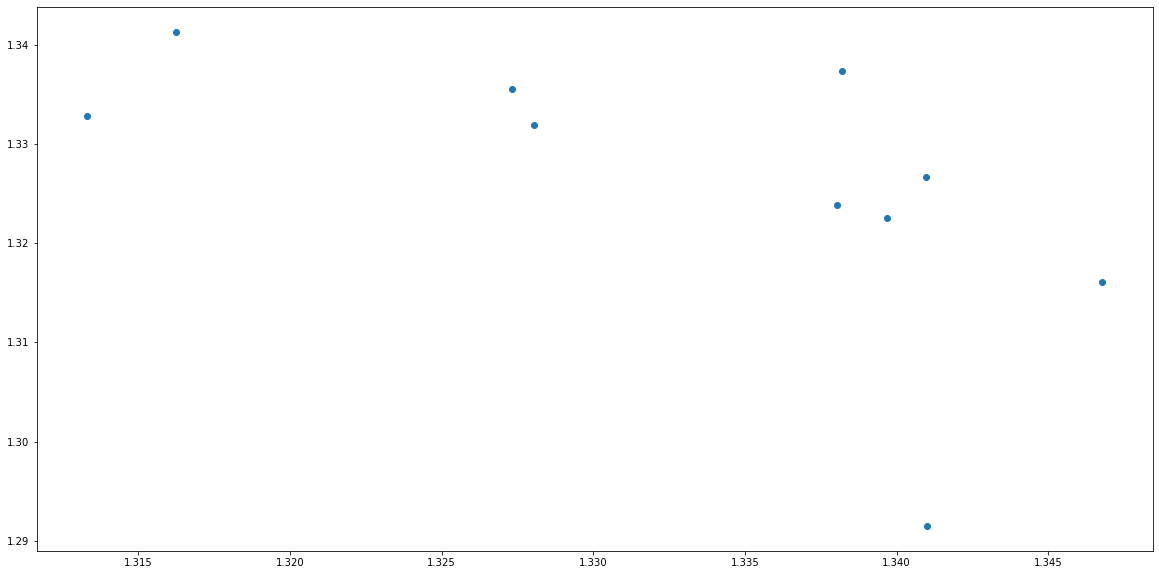

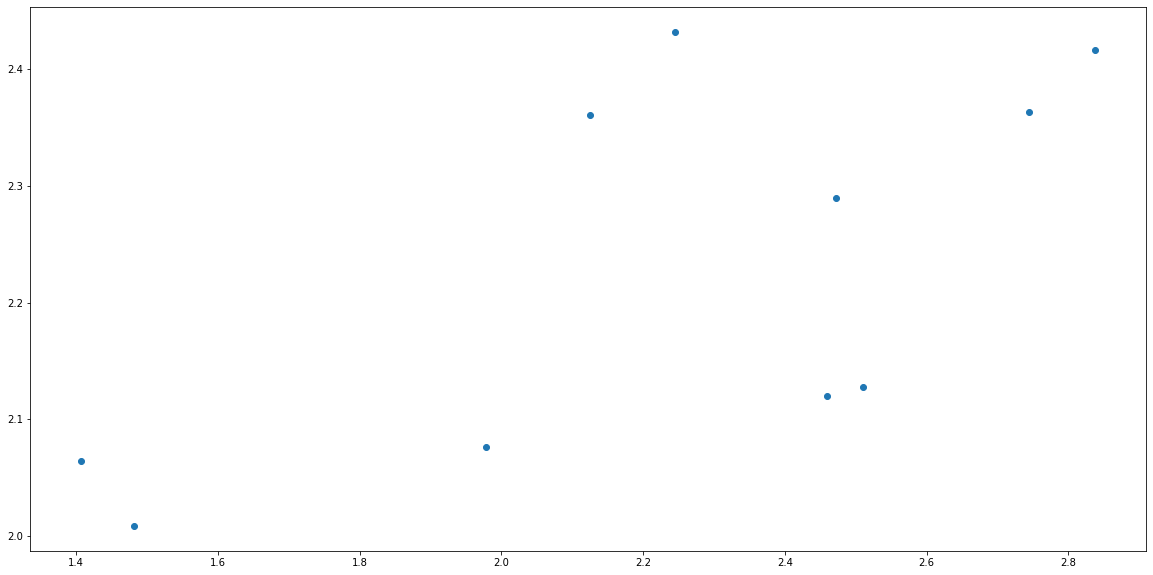

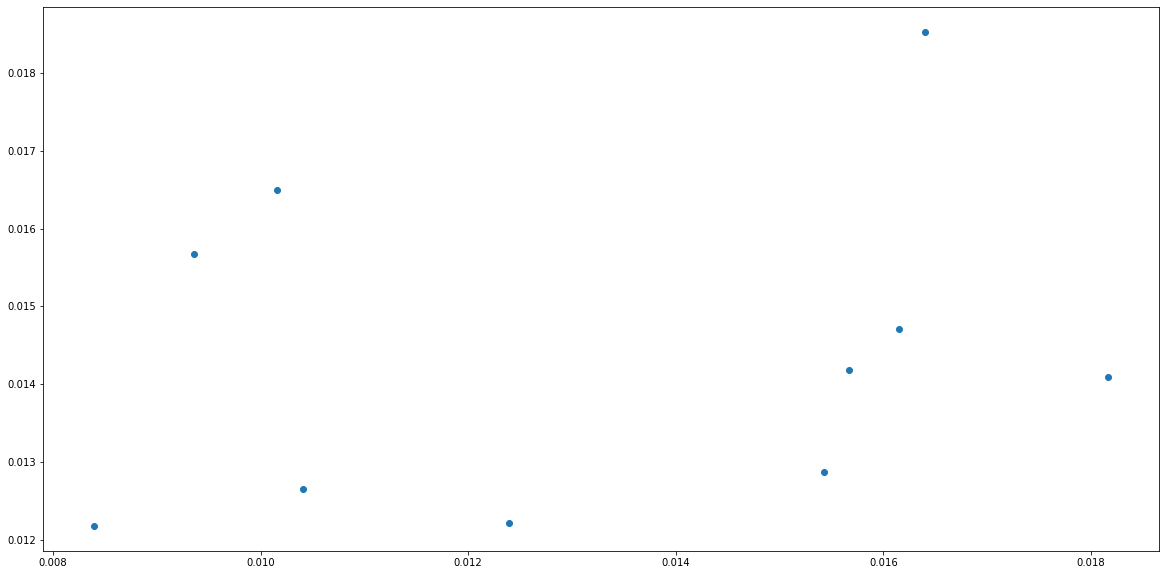

In [7]:
#stand=np.arange(1,10000)
predicted_YYY = gsr3.predict(X_test)
plt.figure(figsize=(20,10))
plt.plot(YYY_test,predicted_YYY,"o")
#plt.plot(stand)
plt.figure(figsize=(20,10))
plt.plot(YY_test,predicted_YY,"o")
plt.figure(figsize=(20,10))
plt.plot(Y_test,predicted_Y,"o")

In [8]:
print(k_tree)

RandomForestRegressor(max_depth=10, max_features=5, n_estimators=5, n_jobs=1,
                      random_state=2)


In [9]:
print(t_tree)

RandomForestRegressor(max_depth=3, max_features=15, n_estimators=10, n_jobs=1,
                      random_state=7)


In [10]:
print(b_tree)

RandomForestRegressor(max_depth=3, max_features=3, n_estimators=5, n_jobs=1,
                      random_state=1)


In [9]:
print(b_tree)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
                      max_features=3, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=25,
                      min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
                      oob_score=False, random_state=340, verbose=0,
                      warm_start=False)


In [1]:
import numpy as np
import numpy.random as random
import scipy as sp
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline
import math
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor as RFR

stand=np.arange(1,10000)

data=pd.read_csv('output_1.csv')
datarange=pd.read_csv('datarange_dry.csv')
x=data.drop(['A','B','No.'],axis=1)
y=data['A']
z=data['B']
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2)
XX_train,XX_test,YY_train,YY_test=train_test_split(x,z,test_size=0.2)

print(X_train.shape[1])

4


In [ ]:
import numpy as np
import numpy.random as random
import scipy as sp
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline
import math
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.model_selection import learning_curve

stand=np.arange(1,10000)

data=pd.read_csv('output_1.csv')
datarange=pd.read_csv('datarange_dry.csv')
x=data.drop(['A','B','No.'],axis=1)
y=data['A']
z=data['B']
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2)
XX_train,XX_test,YY_train,YY_test=train_test_split(x,z,test_size=0.2)



train_sizes, train_scores,test_scores = \
learning_curve(estimator=RFR(), X=X_train, X=Y_train, train_sizes=np.linspace(0.1,1.0,10), cv=5, n_jobs=1)

train_mean = np.mean(train_scores,axis=1)
train_std = np.std(train_scores,axis=1)
test_mean = np.mean(test_scores,axis=1)
test_std = np.std(test_scores,axis=1)

#学習曲線を描画する
plt.plot(train_sizes,train_mean, color='blue', marker='o', markersize=5, label='training accuracy')
plt.plot(train_sizes,test_mean, color='green',linestyle='--', marker='s', markersize=5, label='validation accuracy')

#fill_between関数で平均±標準偏差の幅を塗りつぶす
#トレーニングデータのサイズtrain_sizes,透明度alpha、カラー'blue'を引数に指定
plt.fill_between(train_sizes,train_mean+train_std,train_mean-train_std,alpha=0.15,color='green')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15,color='green')

#グラフの見た目を整える
plt.title('learning curve', fontsize=17)
plt.xlabel('Number of training samples', fontsize=17)
plt.ylabel('Accuracy', fontsize=17)
plt.legend(loc='lower right', fontsize=17)
plt.ylim([0.90,1.0])

#グラフを表示
plt.show()